In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap

/blue/xiaofan/chenyuanhan/.conda/envs/gpn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
def embedding_clustering(file_path):
    
    data = pd.read_csv(file_path)
    x = data.drop(columns=['CHROM', 'START', 'END', 'TYPE', 'CLUSTER', 'SIZE'])
    y = data['CLUSTER']
    
    scaler = StandardScaler()
    X_centered = scaler.fit_transform(x)
    
    reducer = umap.UMAP(n_components=20, random_state=42)  
    X_umap = reducer.fit_transform(X_centered)    
    df_umap = pd.DataFrame(X_umap)
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X_umap)
    clusters=7
    kmeans = KMeans(n_clusters=clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    df_umap['Cluster'] = clusters
    merge_umap = pd.concat([df_umap,y],axis=1)
    
    original_labels = merge_umap['CLUSTER']
    original_labels_encoded = original_labels.astype('category').cat.codes
    # category_mapping = dict(enumerate(original_labels.astype('category').cat.categories))
    # print(category_mapping)
    
    label_names = [
    'first_exon', 
    'first_five_prime_UTR', 
    'first_intron', 
    'first_three_prime_UTR', 
    'ncRNA_gene', 
    'pseudogene', 
    'smallRNA'
    ]
    conf_matrix = confusion_matrix(original_labels_encoded, clusters)
    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2%', cmap='Blues', yticklabels=label_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    reducer = umap.UMAP(n_components=2, random_state=42)  
    X_umap = reducer.fit_transform(X_centered)
    cluster_labels = original_labels
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=cluster_labels, palette='Set1')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.legend(title='True Label', bbox_to_anchor=(1.05, 1))
    plt.grid(True)
    plt.show()

### 1 NT

In [ ]:
file_path = '/blue/xiaofan/sunhuaikuan/PAPERS/DNA_LLM_REVIEW/embeddings/clustering/nt/nt_embedding_true.csv'
embedding_clustering(file_path)

### GPN

In [ ]:
file_path = '/blue/xiaofan/sunhuaikuan/PAPERS/DNA_LLM_REVIEW/embeddings/clustering/gpn/gpn_embedding_true.csv'
embedding_clustering(file_path)

### DNABERT2

In [ ]:
file_path = '/blue/xiaofan/sunhuaikuan/PAPERS/DNA_LLM_REVIEW/embeddings/clustering/dnabert2/dnabert2_embedding_true.csv'
embedding_clustering(file_path)

### 4Hyena-dna

In [ ]:
file_path = '/blue/xiaofan/sunhuaikuan/PAPERS/DNA_LLM_REVIEW/embeddings/clustering/hyenadna/hd_embedding_true.csv'
embedding_clustering(file_path)

### 5 Caduceus

/scratch/local/48541374/ipykernel_4132301/2026798689.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
/home/chenyuanhan/.local/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


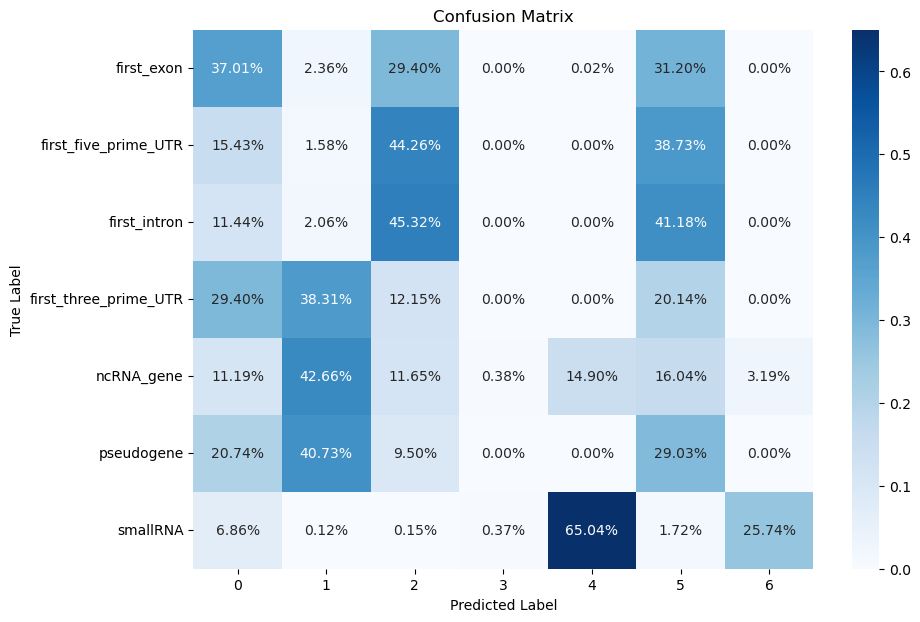

/home/chenyuanhan/.local/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


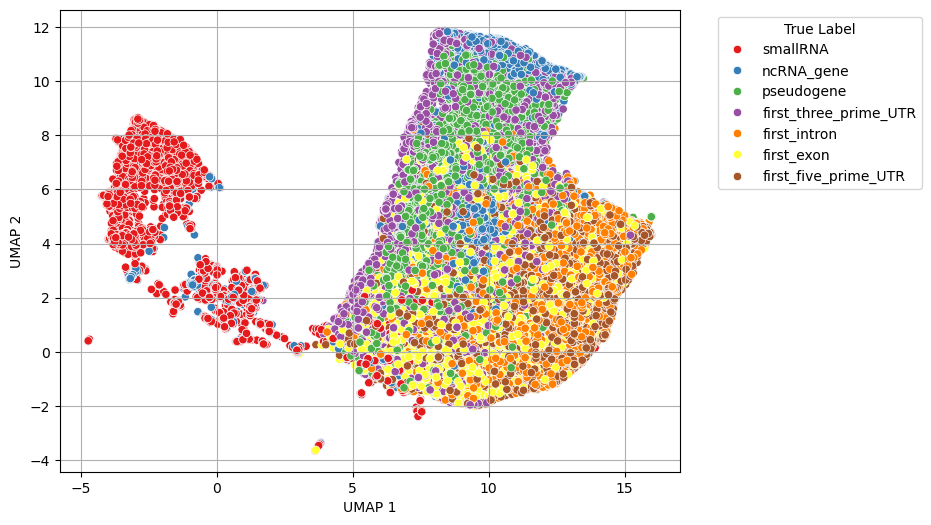

In [10]:
file_path = '/blue/xiaofan/chenyuanhan/caduceus/cd_embedding_true.csv'
embedding_clustering(file_path)